# Approach 1: Clustering

In [1]:
!pip install -U sentence-transformers

In [2]:
!pip install nltk

In [3]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import re

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
df = pd.read_csv('customer_support_tickets.csv')

In [5]:
categories=df['Ticket Subject'].unique()

In [6]:
tickets = df['Ticket Description']

In [7]:
df['Ticket Subject'].value_counts()

,count
Ticket Subject,
Refund request,576
Software bug,574
Product compatibility,567
Delivery problem,561
Hardware issue,547
Battery life,542
Network problem,539
Installation support,530
Product setup,529


In [8]:
data = {'text': tickets, 'target': df['Ticket Subject']}

In [9]:
df = pd.DataFrame(data)

In [10]:
def preprocess_text(text: str) -> str:
    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # remove stopwords
    tokens = nltk.word_tokenize(text)
    tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
    text = " ".join(tokens)
    text = text.lower().strip()

    return text

df['text_cleaned'] = df['text'].apply(lambda text: preprocess_text(text))
df = df[df['text_cleaned'] != '']

#### TF-IDF

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(df['text_cleaned']).toarray()

#### Sentence Transformers

In [14]:
import time
st = time.time()

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
df['encode_transforemers'] = df['text_cleaned'].apply(lambda text: model.encode(text, convert_to_numpy=True).flatten())

et = time.time()

print("Elapsed time: {:.2f} seconds".format(et - st))

X_transformers = np.vstack(df['encode_transforemers'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Elapsed time: 286.81 seconds


#### Glove

In [14]:
!pip install torchtext==0.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.

In [15]:
from torchtext.vocab import GloVe

In [16]:
embeddings = GloVe(name='6B', dim=100)

# Set the maximum sentence length and embedding dimension
max_length = 100
embedding_dim = 100

# define a function to convert a sentence to a fixed-size vector using GloVe embeddings
def sentence_embedding(sentence):
    words = sentence.split()
    num_words = min(len(words), max_length)
    embedding_sentence = np.zeros((max_length, embedding_dim))

    for i in range(num_words):
        word = words[i]
        if word in embeddings.stoi:
            embedding_sentence[i] = embeddings.vectors[embeddings.stoi[word]]

    return embedding_sentence.flatten()

df['encode_glove'] = df['text_cleaned'].apply(lambda sentence: sentence_embedding(sentence))
X_glove = np.vstack(df['encode_glove'])

.vector_cache/glove.6B.zip: 862MB [02:52, 4.99MB/s]                           
100%|█████████▉| 399999/400000 [00:25<00:00, 15830.34it/s]


#### BERT CLS

In [17]:
import torch
from transformers import BertTokenizer, BertModel
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_cls_sentence(sentence):
    # Tokenize input sentence and convert to tensor
    input_ids = torch.tensor([tokenizer.encode(sentence, add_special_tokens=True, max_length=512)])

    # Pass input through BERT model and extract embeddings for [CLS] token
    with torch.no_grad():
        outputs = model(input_ids)
        cls_embedding = outputs[0][:, 0, :]

    return cls_embedding.flatten()

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [18]:
import time
st = time.time()

df['cls_bert'] = df['text_cleaned'].apply(lambda sentence: get_cls_sentence(sentence))

et = time.time()

print("Elapsed time: {:.2f} seconds".format(et - st))

X_cls_bert = np.vstack(df['cls_bert'])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Elapsed time: 1680.20 seconds


In [19]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score

def eval_cluster(embedding):
    y_pred = kmeans.fit_predict(embedding)

    # Evaluate the performance using ARI, NMI, and FMI
    ari = adjusted_rand_score(df["target"], y_pred)
    nmi = normalized_mutual_info_score(df["target"], y_pred)
    fmi = fowlkes_mallows_score(df["target"], y_pred)

    # Print Metrics scores
    print("Adjusted Rand Index (ARI): {:.3f}".format(ari))
    print("Normalized Mutual Information (NMI): {:.3f}".format(nmi))
    print("Fowlkes-Mallows Index (FMI): {:.3f}".format(fmi))

In [20]:
def dimension_reduction(embedding, method):

    pca = PCA(n_components=2, random_state=42)

    pca_vecs = pca.fit_transform(embedding)

    # save our two dimensions into x0 and x1
    x0 = pca_vecs[:, 0]
    x1 = pca_vecs[:, 1]

    df[f'x0_{method}'] = x0
    df[f'x1_{method}'] = x1

In [21]:
def plot_pca(x0_name, x1_name, cluster_name, method):

    plt.figure(figsize=(12, 7))

    plt.title(f"KMeans clustering with {method}", fontdict={"fontsize": 18})
    plt.xlabel("X0", fontdict={"fontsize": 16})
    plt.ylabel("X1", fontdict={"fontsize": 16})

    sns.scatterplot(data=df, x=x0_name, y=x1_name, hue=cluster_name, palette="viridis")
    plt.show()

In [22]:
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Adjusted Rand Index (ARI): 0.000
Normalized Mutual Information (NMI): 0.005
Fowlkes-Mallows Index (FMI): 0.066


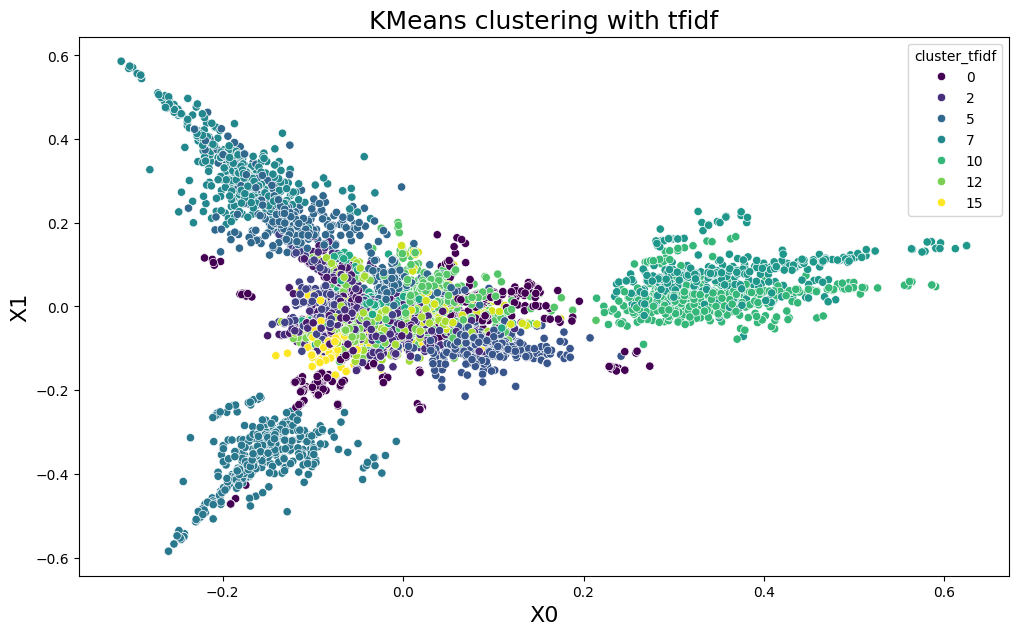

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Adjusted Rand Index (ARI): -0.000
Normalized Mutual Information (NMI): 0.005
Fowlkes-Mallows Index (FMI): 0.073


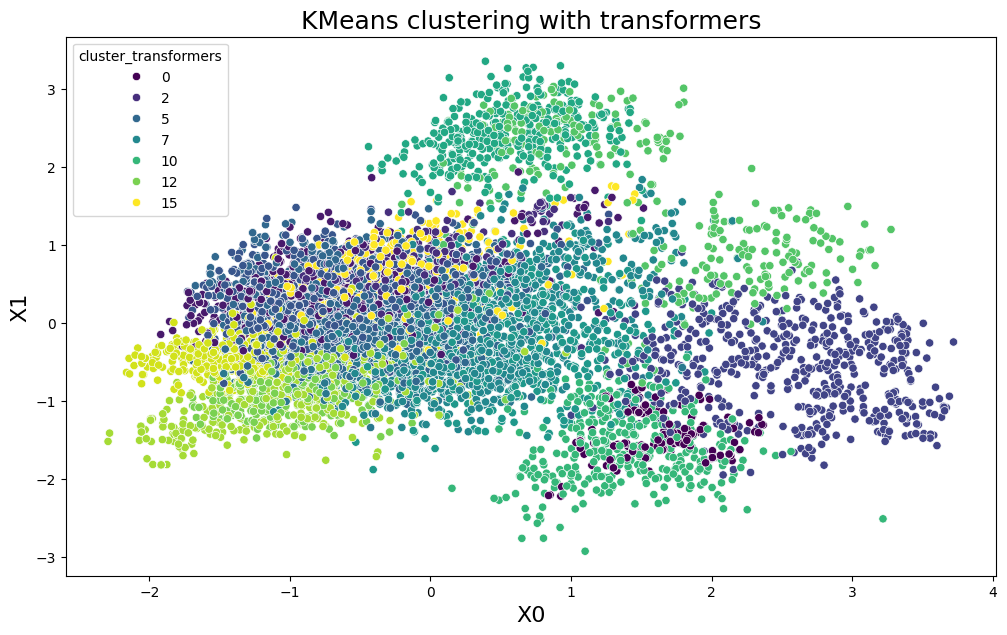

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Adjusted Rand Index (ARI): 0.000
Normalized Mutual Information (NMI): 0.005
Fowlkes-Mallows Index (FMI): 0.090


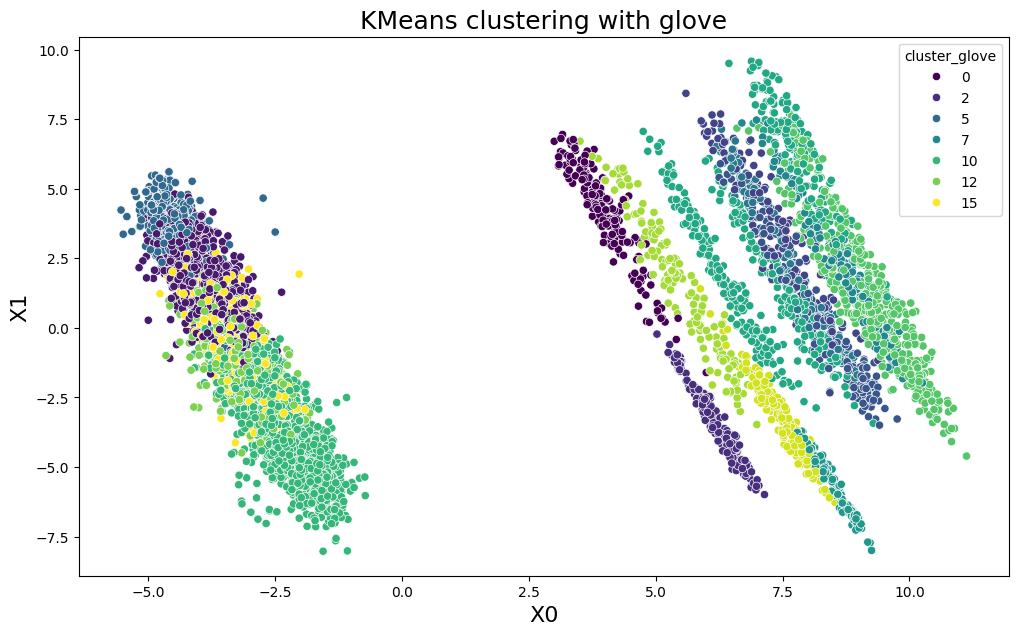

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Adjusted Rand Index (ARI): -0.000
Normalized Mutual Information (NMI): 0.005
Fowlkes-Mallows Index (FMI): 0.066


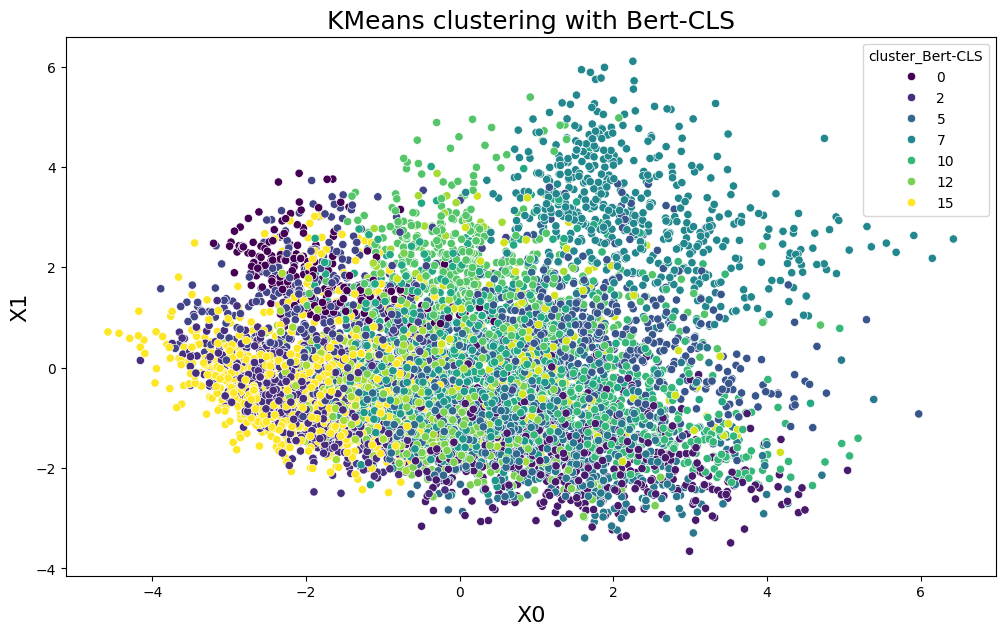

In [23]:
for embedding_and_method in [(X, 'tfidf'), (X_transformers, 'transformers'), (X_glove, 'glove'), ((X_cls_bert, 'Bert-CLS')) ]:
    embedding, method = embedding_and_method[0], embedding_and_method[1]

    # initialize kmeans with 3 centroids
    kmeans = KMeans(n_clusters=16, random_state=42)

    # fit the model
    kmeans.fit(embedding)

    # store cluster labels in a variable
    clusters = kmeans.labels_

    # Assign clusters to our dataframe
    clusters_result_name = f'cluster_{method}'
    df[clusters_result_name] = clusters

    eval_cluster(embedding)

    dimension_reduction(embedding, method)

    plot_pca(f'x0_{method}', f'x1_{method}', cluster_name=clusters_result_name, method=method)

# Approach 2 : Training a model to predict label

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


## Step 1: Preprocessing & Feature Extraction

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Download NLTK stopwords (if not already done)
nltk.download('stopwords')

# Load your dataset
df = pd.read_csv('customer_support_tickets.csv')

# Preprocessing the ticket description (lowercasing, removing special characters)
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

df['Ticket Description'] = df['Ticket Description'].apply(preprocess_text)

# Label encoding for Ticket Subject (convert categorical output to numerical)
label_encoder = LabelEncoder()
df['Ticket Subject'] = label_encoder.fit_transform(df['Ticket Subject'])

# Split the data into train and test sets
X = df['Ticket Description']
y = df['Ticket Subject']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Step 2: Vectorization

#### TF-IDF Vectorizer

In [ ]:
# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


#### Sentence Transformers (BERT-based)

In [ ]:
from sentence_transformers import SentenceTransformer

# Initialize the BERT-based Sentence Transformer
model_transformers = SentenceTransformer('paraphrase-MiniLM-L6-v2')
X_train_transformers = model_transformers.encode(X_train.tolist(), show_progress_bar=True)
X_test_transformers = model_transformers.encode(X_test.tolist(), show_progress_bar=True)


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/212 [00:00<?, ?it/s]

Batches:   0%|          | 0/53 [00:00<?, ?it/s]

#### GloVe Embeddings

In [ ]:
import gensim.downloader as api

# Load GloVe embeddings from gensim (glove-wiki-gigaword-100 or similar)
glove_model = api.load('glove-wiki-gigaword-100')

# Function to convert sentences to GloVe embeddings
def get_glove_embedding(text, glove_model, dim=100):
    words = text.split()
    embedding = np.zeros(dim)
    count = 0
    for word in words:
        if word in glove_model:
            embedding += glove_model[word]
            count += 1
    if count > 0:
        embedding /= count
    return embedding

X_train_glove = np.array([get_glove_embedding(text, glove_model) for text in X_train])
X_test_glove = np.array([get_glove_embedding(text, glove_model) for text in X_test])


[==================================================] 100.0% 128.1/128.1MB downloaded


## Step 3: Model Training

#### 1. TF-IDF + Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Naive Bayes Classifier with TF-IDF features
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluation
print("Naive Bayes + TF-IDF Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes + TF-IDF Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes + TF-IDF Accuracy: 0.05962219598583235
Naive Bayes + TF-IDF Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.13      0.05      0.07       127
           2       0.09      0.05      0.07        79
           3       0.00      0.00      0.00       102
           4       0.07      0.15      0.10       113
           5       0.08      0.02      0.03        90
           6       0.04      0.03      0.04       117
           7       0.04      0.03      0.03       112
           8       0.04      0.04      0.04       101
           9       0.04      0.04      0.04       105
          10       0.03      0.01      0.02        89
          11       0.05      0.14      0.08       108
          12       0.09      0.05      0.06       101
          13       0.13      0.07      0.09       117
          14       0.05      0.12      0.08       117
          15       0.05      0.13      

#### 2. TF-IDF + Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with TF-IDF features
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluation
print("Logistic Regression + TF-IDF Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression + TF-IDF Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression + TF-IDF Accuracy: 0.06316410861865407
Logistic Regression + TF-IDF Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.12      0.08      0.09       127
           2       0.09      0.10      0.10        79
           3       0.08      0.04      0.05       102
           4       0.08      0.11      0.09       113
           5       0.06      0.06      0.06        90
           6       0.05      0.04      0.04       117
           7       0.04      0.04      0.04       112
           8       0.06      0.07      0.07       101
           9       0.04      0.04      0.04       105
          10       0.08      0.08      0.08        89
          11       0.06      0.11      0.08       108
          12       0.04      0.04      0.04       101
          13       0.10      0.09      0.09       117
          14       0.06      0.07      0.07       117
          15       0.05

#### 3. TF-IDF + Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier with TF-IDF features
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluation
print("Random Forest + TF-IDF Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest + TF-IDF Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest + TF-IDF Accuracy: 0.06080283353010626
Random Forest + TF-IDF Classification Report:
               precision    recall  f1-score   support

           0       0.04      0.04      0.04       106
           1       0.08      0.08      0.08       127
           2       0.07      0.10      0.09        79
           3       0.12      0.08      0.09       102
           4       0.08      0.08      0.08       113
           5       0.07      0.07      0.07        90
           6       0.04      0.04      0.04       117
           7       0.06      0.05      0.06       112
           8       0.04      0.04      0.04       101
           9       0.05      0.05      0.05       105
          10       0.03      0.03      0.03        89
          11       0.10      0.13      0.11       108
          12       0.05      0.04      0.05       101
          13       0.09      0.09      0.09       117
          14       0.03      0.03      0.03       117
          15       0.02      0.03  

#### 4. GloVe + Random Forest

In [ ]:
# Random Forest Classifier with GloVe embeddings
rf_model_glove = RandomForestClassifier(n_estimators=100)
rf_model_glove.fit(X_train_glove, y_train)
y_pred_rf_glove = rf_model_glove.predict(X_test_glove)

# Evaluation
print("Random Forest + GloVe Accuracy:", accuracy_score(y_test, y_pred_rf_glove))
print("Random Forest + GloVe Classification Report:\n", classification_report(y_test, y_pred_rf_glove))


Random Forest + GloVe Accuracy: 0.06257378984651712
Random Forest + GloVe Classification Report:
               precision    recall  f1-score   support

           0       0.05      0.05      0.05       106
           1       0.04      0.04      0.04       127
           2       0.10      0.10      0.10        79
           3       0.10      0.08      0.09       102
           4       0.08      0.11      0.09       113
           5       0.04      0.03      0.04        90
           6       0.07      0.08      0.08       117
           7       0.06      0.06      0.06       112
           8       0.04      0.05      0.05       101
           9       0.07      0.07      0.07       105
          10       0.03      0.02      0.02        89
          11       0.06      0.08      0.07       108
          12       0.09      0.09      0.09       101
          13       0.08      0.05      0.06       117
          14       0.03      0.03      0.03       117
          15       0.06      0.06    

#### 5. Sentence Transformers + Logistic Regression

In [ ]:
# Logistic Regression with Sentence Transformers embeddings
lr_model_transformers = LogisticRegression(max_iter=1000)
lr_model_transformers.fit(X_train_transformers, y_train)
y_pred_transformers = lr_model_transformers.predict(X_test_transformers)

# Evaluation
print("Logistic Regression + Transformers Accuracy:", accuracy_score(y_test, y_pred_transformers))
print("Logistic Regression + Transformers Classification Report:\n", classification_report(y_test, y_pred_transformers))


Logistic Regression + Transformers Accuracy: 0.06847697756788666
Logistic Regression + Transformers Classification Report:
               precision    recall  f1-score   support

           0       0.06      0.05      0.05       106
           1       0.07      0.07      0.07       127
           2       0.07      0.09      0.08        79
           3       0.09      0.06      0.07       102
           4       0.08      0.10      0.09       113
           5       0.07      0.07      0.07        90
           6       0.03      0.03      0.03       117
           7       0.07      0.06      0.06       112
           8       0.05      0.05      0.05       101
           9       0.08      0.10      0.09       105
          10       0.05      0.04      0.05        89
          11       0.08      0.12      0.10       108
          12       0.07      0.06      0.07       101
          13       0.05      0.03      0.04       117
          14       0.09      0.10      0.10       117
          1

## Step 4: Deep Learning

In [ ]:
!pip install transformers

#### 6. BERT for Text Classification

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification, create_optimizer
import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Load BERT tokenizer and model
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Tokenize the text
X_train_bert = tokenizer_bert(X_train.tolist(), truncation=True, padding=True, max_length=128, return_tensors='tf')
X_test_bert = tokenizer_bert(X_test.tolist(), truncation=True, padding=True, max_length=128, return_tensors='tf')

# Define optimizer using Hugging Face's create_optimizer
batch_size = 16
epochs = 3
steps_per_epoch = len(X_train_bert['input_ids']) // batch_size
total_train_steps = steps_per_epoch * epochs
warmup_steps = int(0.1 * total_train_steps)

# Create AdamW optimizer
optimizer, lr_schedule = create_optimizer(init_lr=3e-5, num_train_steps=total_train_steps, num_warmup_steps=warmup_steps)

# Compile the model
loss = SparseCategoricalCrossentropy(from_logits=True)

model_bert.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Train the BERT model
model_bert.fit(X_train_bert['input_ids'], y_train, validation_data=(X_test_bert['input_ids'], y_test), epochs=epochs, batch_size=batch_size)

# Evaluation
y_pred_bert = np.argmax(model_bert.predict(X_test_bert['input_ids']).logits, axis=-1)
print("BERT Accuracy:", accuracy_score(y_test, y_pred_bert))
print("BERT Classification Report:\n", classification_report(y_test, y_pred_bert))


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
424/424 [==============================] - 262s 484ms/step - loss: 2.7866 - accuracy: 0.0605 - val_loss: 2.7855 - val_accuracy: 0.0691
Epoch 2/3
424/424 [==============================] - 208s 492ms/step - loss: 2.7847 - accuracy: 0.0708 - val_loss: 2.7760 - val_accuracy: 0.0691
Epoch 3/3
53/53 [==============================] - 15s 232ms/step
BERT Accuracy: 0.0690672963400236
BERT Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.00      0.00      0.00       127
           2       0.00      0.00      0.00        79
           3       0.00      0.00      0.00       102
           4       0.00      0.00      0.00       113
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00       117
           7       0.00      0.00      0.00       112
           8       0.00      0.00      0.00       101
           9       0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 7. LSTM with GloVe

In [ ]:
import requests, zipfile, os
from io import BytesIO

# Step 1: Download the GloVe embeddings (Common Crawl 6B)
url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_dir = "glove"

# Create a directory to store the embeddings
if not os.path.exists(glove_dir):
    os.makedirs(glove_dir)

print("Downloading GloVe embeddings...")
response = requests.get(url)

# Step 2: Unzip the file into the glove directory
print("Unzipping the embeddings...")
with zipfile.ZipFile(BytesIO(response.content)) as zip_ref:
    zip_ref.extractall(glove_dir)

print("Download and extraction complete!")


Unzipping the embeddings...
Download and extraction complete!


In [ ]:
glove_file = os.path.join(glove_dir, 'glove.6B.100d.txt')

In [ ]:
glove_file

'glove/glove.6B.100d.txt'

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load your data (Ticket descriptions and subjects)
df = pd.read_csv('customer_support_tickets.csv')  # Make sure to load your dataset here
X = df['Ticket Description'].values
y = df['Ticket Subject'].values

# Step 2: Preprocess the data
# Tokenizing the text data
vocab_size = 5000  # Set a fixed vocab size based on your dataset size
max_length = 100   # Set max length for padding
embedding_dim = 100  # GloVe typically uses 100, 200, or 300 dimensions

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post')

# Label encoding for y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)

# Step 3: Load GloVe embeddings
# Load pre-trained GloVe embeddings (adjust the path based on where your GloVe file is stored)
# Assuming you're using the 100d GloVe embeddings
embedding_index = {}

with open(glove_file , 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

# Step 4: Create the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector  # Words not found in the GloVe model will remain zeros

# Step 5: Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                    input_length=max_length, weights=[embedding_matrix],
                    trainable=False))  # Use pre-trained embeddings and keep them frozen
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Number of classes equals the number of unique subjects

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Step 7: Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=-1)
print("LSTM with GloVe Accuracy:", accuracy_score(y_test, y_pred))
print("LSTM with GloVe Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


212/212 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.0573 - loss: 2.7734 - val_accuracy: 0.0691 - val_loss: 2.7715
Epoch 2/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0695 - loss: 2.7718 - val_accuracy: 0.0667 - val_loss: 2.7712
Epoch 3/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0647 - loss: 2.7721 - val_accuracy: 0.0649 - val_loss: 2.7720
Epoch 4/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0684 - loss: 2.7711 - val_accuracy: 0.0649 - val_loss: 2.7716
Epoch 5/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0654 - loss: 2.7720 - val_accuracy: 0.0638 - val_loss: 2.7718
Epoch 6/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.0714 - loss: 2.7721 - val_accuracy: 0.0638 - val_loss: 2.7728
Epoch 7/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.0634 - loss: 2.7718 - val_accuracy: 0.0649 - val_loss: 2.7716
Epoch 8/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0688 - loss: 2.7710 - val_accuracy: 0.06

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Approach 3: with BERTTopic

In [ ]:
!pip install git+https://github.com/MaartenGr/BERTopic.git@fix_2100

  Cloning https://github.com/MaartenGr/BERTopic.git (to revision fix_2100) to /tmp/pip-req-build-v4k309j6
  Running command git clone --filter=blob:none --quiet https://github.com/MaartenGr/BERTopic.git /tmp/pip-req-build-v4k309j6
  Running command git checkout -b fix_2100 --track origin/fix_2100
  Switched to a new branch 'fix_2100'
  Branch 'fix_2100' set up to track remote branch 'fix_2100' from 'origin'.
  Resolved https://github.com/MaartenGr/BERTopic.git to commit 12c5d26c87384bed199a5314440e4300b415a521
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.4 MB/s eta 0:00:00
  Created wheel for bertopic: filename=bertopic-0.16.3-py3-none-any.whl size=142452 sha256=c6f093f074224b3906d1b3ecb

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('customer_support_tickets.csv')

# Extract the columns you need
descriptions = df['Ticket Description'].tolist()


In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Step 1: Load a pre-trained transformer model for embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")  # A lightweight model for speed

# Step 2: Create BERTopic instance (no need to specify number of clusters)
topic_model = BERTopic(embedding_model=embedding_model)

# Step 3: Fit the BERTopic model to your data
topics, probabilities = topic_model.fit_transform(descriptions)

# Explore the generated topics
print(topic_model.get_topic_info())


     Topic  Count                                         Name  \
0       -1   1230                          -1_the_issue_but_to   
1        0    335        0_peculiar_popping_error_message_mean   
2        1    335                 1_desired_through_find_guide   
3        2    327             2_concerned_safe_security_ensure   
4        3    320       3_afterward_firmware_happening_updated   
..     ...    ...                                          ...   
124    123     11          123_turning_yesterday_respond_until   
125    124     11            124_connecting_detect_fi_although   
126    125     11                 125_lost_crashed_stored_data   
127    126     11  126_deleted_urgently_accidentally_important   
128    127     11         127_flickering_screen_concerned_safe   

                                        Representation  \
0    [the, issue, but, to, troubleshooting, with, o...   
1    [peculiar, popping, error_message, mean, messa...   
2    [desired, through, find, gui

In [ ]:
topic_model.visualize_topics()

In [ ]:
new_ticket_description = "I can't log in to my account"
new_embedding = embedding_model.encode([new_ticket_description])

# Predict the topic for the new ticket
new_topic, new_probabilities = topic_model.transform(new_ticket_description)
print(f"Predicted topic: {new_topic[0]} with probability: {new_probabilities[0]}")


Predicted topic: 16 with probability: 1.0


In [ ]:
topic_model.get_topic(16)

[('locked', 0.07009914001025465),
 ('unlock', 0.06687764971757475),
 ('logging', 0.06455588764313126),
 ('into', 0.06297098757832019),
 ('account', 0.05909591128110203),
 ('issues', 0.05126062933561571),
 ('should', 0.03691305047824177),
 ('says', 0.036398860486123855),
 ('do', 0.03612358608538759),
 ('facing', 0.033911681883536354)]

In [ ]:
# Further reduce topics
# Reduce the number of topics to 16
topic_model = topic_model.reduce_topics(descriptions, nr_topics=16)

# Get the updated topic information
reduced_topic_info = topic_model.get_topic_info()

# Display the reduced topics
print(reduced_topic_info)




    Topic  Count                                           Name  \
0      -1   1230              -1_the_issue_to_product_purchased   
1       0   4162                          0_the_issue_please_an   
2       1    455                          1_software_bug_in_the   
3       2    355       2_peculiar_error_message_popping_message   
4       3    327               3_concerned_safe_security_ensure   
5       4    312                      4_account_access_my_login   
6       5    300                        5_data_deleted_lost_way   
7       6    283                  6_networks_connecting_to_what   
8       7    174               7_charger_charging_came_original   
9       8    169        8_internet_connection_network_establish   
10      9    150              9_turning_yesterday_respond_until   
11     10    143            10_flickering_screen_hardware_seems   
12     11    136               11_password_account_forgotten_my   
13     12    135          12_noises_strange_functioning_suspec

In [ ]:
topic_model.visualize_topics()


In [ ]:
new_topic, new_probabilities = topic_model.transform("I'm facing a problem. Laptop is not turning on. It was working fine until yesterday, but now it doesn't respond.")
print(f"Predicted topic: {new_topic[0]} with probability: {new_probabilities[0]}")

Predicted topic: 10 with probability: 0.7450648332767008


In [ ]:
topic_model.get_topic(10)

[('flickering', 0.1061905314372226),
 ('screen', 0.08635096192654232),
 ('hardware', 0.08492412654322766),
 ('seems', 0.07991665239387842),
 ('should', 0.079292998297134),
 ('do', 0.07786297322691173),
 ('use', 0.07313274658850626),
 ('unable', 0.07025750949869529),
 ('to', 0.06969653898181577),
 ('there', 0.06600834980434568)]

In [ ]:
!pip install wordcloud


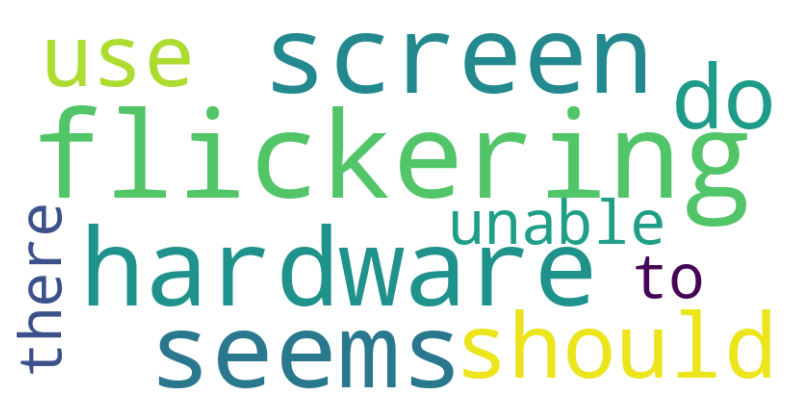

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the top words for a specific topic (e.g., topic 10)
topic = topic_model.get_topic(10)  # Replace 10 with the topic number you're interested in

# Prepare the words and their importance as a dictionary
words = {word: value for word, value in topic}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(words)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# Visualize the topic-document distribution as a heatmap
topic_model.visualize_barchart()
